What is the best neighborhood in Pittsburgh?


In [6]:
#Use crime statisitics to first find the world neighborhoods consistenlty across the board then find the neighborhoods that experince the least crime (of course we assume per capita of that area)
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt





#Least Crime
#Highest rate of Employment 
#Enviroment Quality



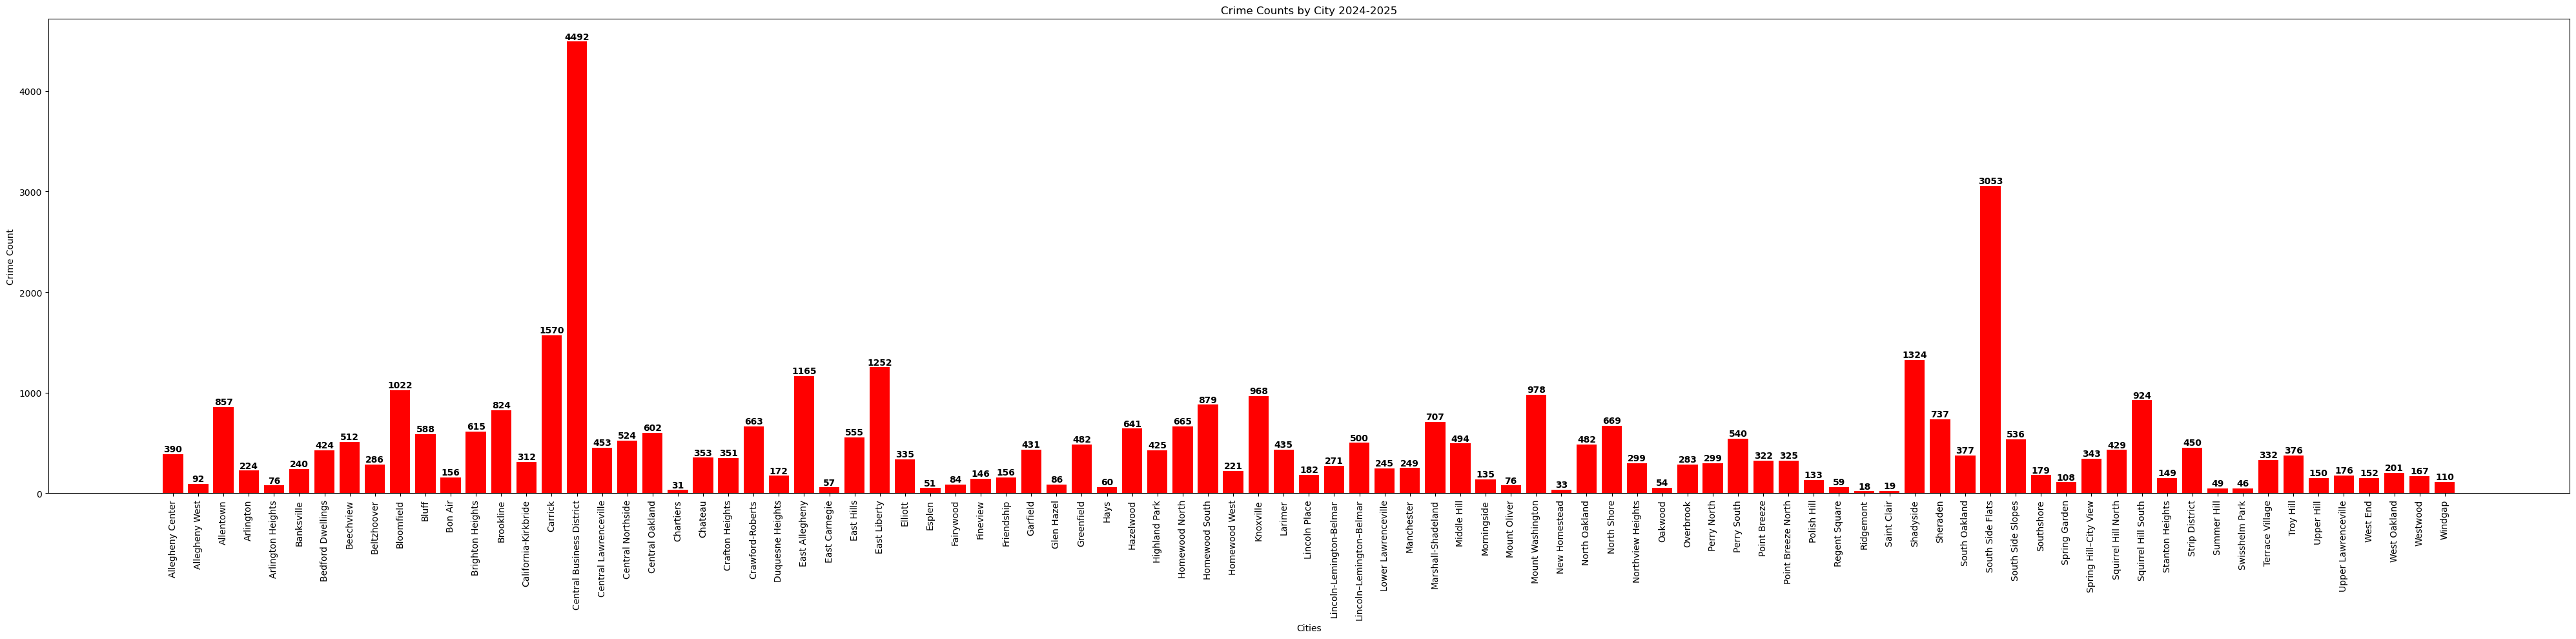

In [1]:
#Types of Crimes in pittsburgh excluding sex crimes 
import matplotlib.pyplot as plt
import pandas as pd

crime = pd.read_csv('pghcrime2024.csv', dtype={17: str})


# Remove NAN
crime = crime[crime['Neighborhood'].notna()]
crime['Neighborhood'] = crime['Neighborhood'].astype(str)  # Ensure city names are strings


cities = sorted(list(crime['Neighborhood'].unique())) #Indivusally sorted citites 


repeat_cities = crime['Neighborhood'].tolist() #repeated cities to keep track, each city name == +1 crime


crime_dict = {} #hash tabel to connect city name == +1 crime

# Counting the crimes per city
for city in repeat_cities:
    if city in crime_dict:
        crime_dict[city] += 1
    else:
        crime_dict[city] = 1


crime_counts = [crime_dict[city] for city in cities] #sorting cities according the counted number of crimes so its 1:1 when looking at both arrays 


plt.figure(figsize=(40, 10)) #bar graph
bars = plt.bar(cities, crime_counts, color='red') #x and y axis and color of bars 


plt.xticks(rotation=90) #rotates the names youll see at the borrom of the graph bevause otherwise it would just like horizontal jubled up words 


for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (crime count)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5,  # Position above the bar  ,, so basically bar.get_x() is the x coordinate for the indvual bar and the get_width/2 just gives the very venter of the bar and yval is just the coordinate of the text which is above the bar and im adding 5 so it doesnt really cover the bar itself but give cushinojng so it floats slgihlt above 
             str(yval), ha='center', va='bottom', color='black', fontweight='bold') #convert crime count nto string and now im just centering the text itself and changing the color/font no diffrent then using google docs 

# Labels and title
plt.xlabel('Cities')
plt.ylabel('Crime Count')
plt.title('Crime Counts by City 2024-2025')

# Show the plot
plt.tight_layout()  # Ensure the labels fit within the figure
plt.show()



The areas with obviously the most crime are 

**Central Business District**
**Southside Flats**
**Shadyside**

...and obviously a few others but we will dive into what crimes are in these areas and try to find any simillarties but first we will see what crimes in pittsburgh in general tend to be most commited 

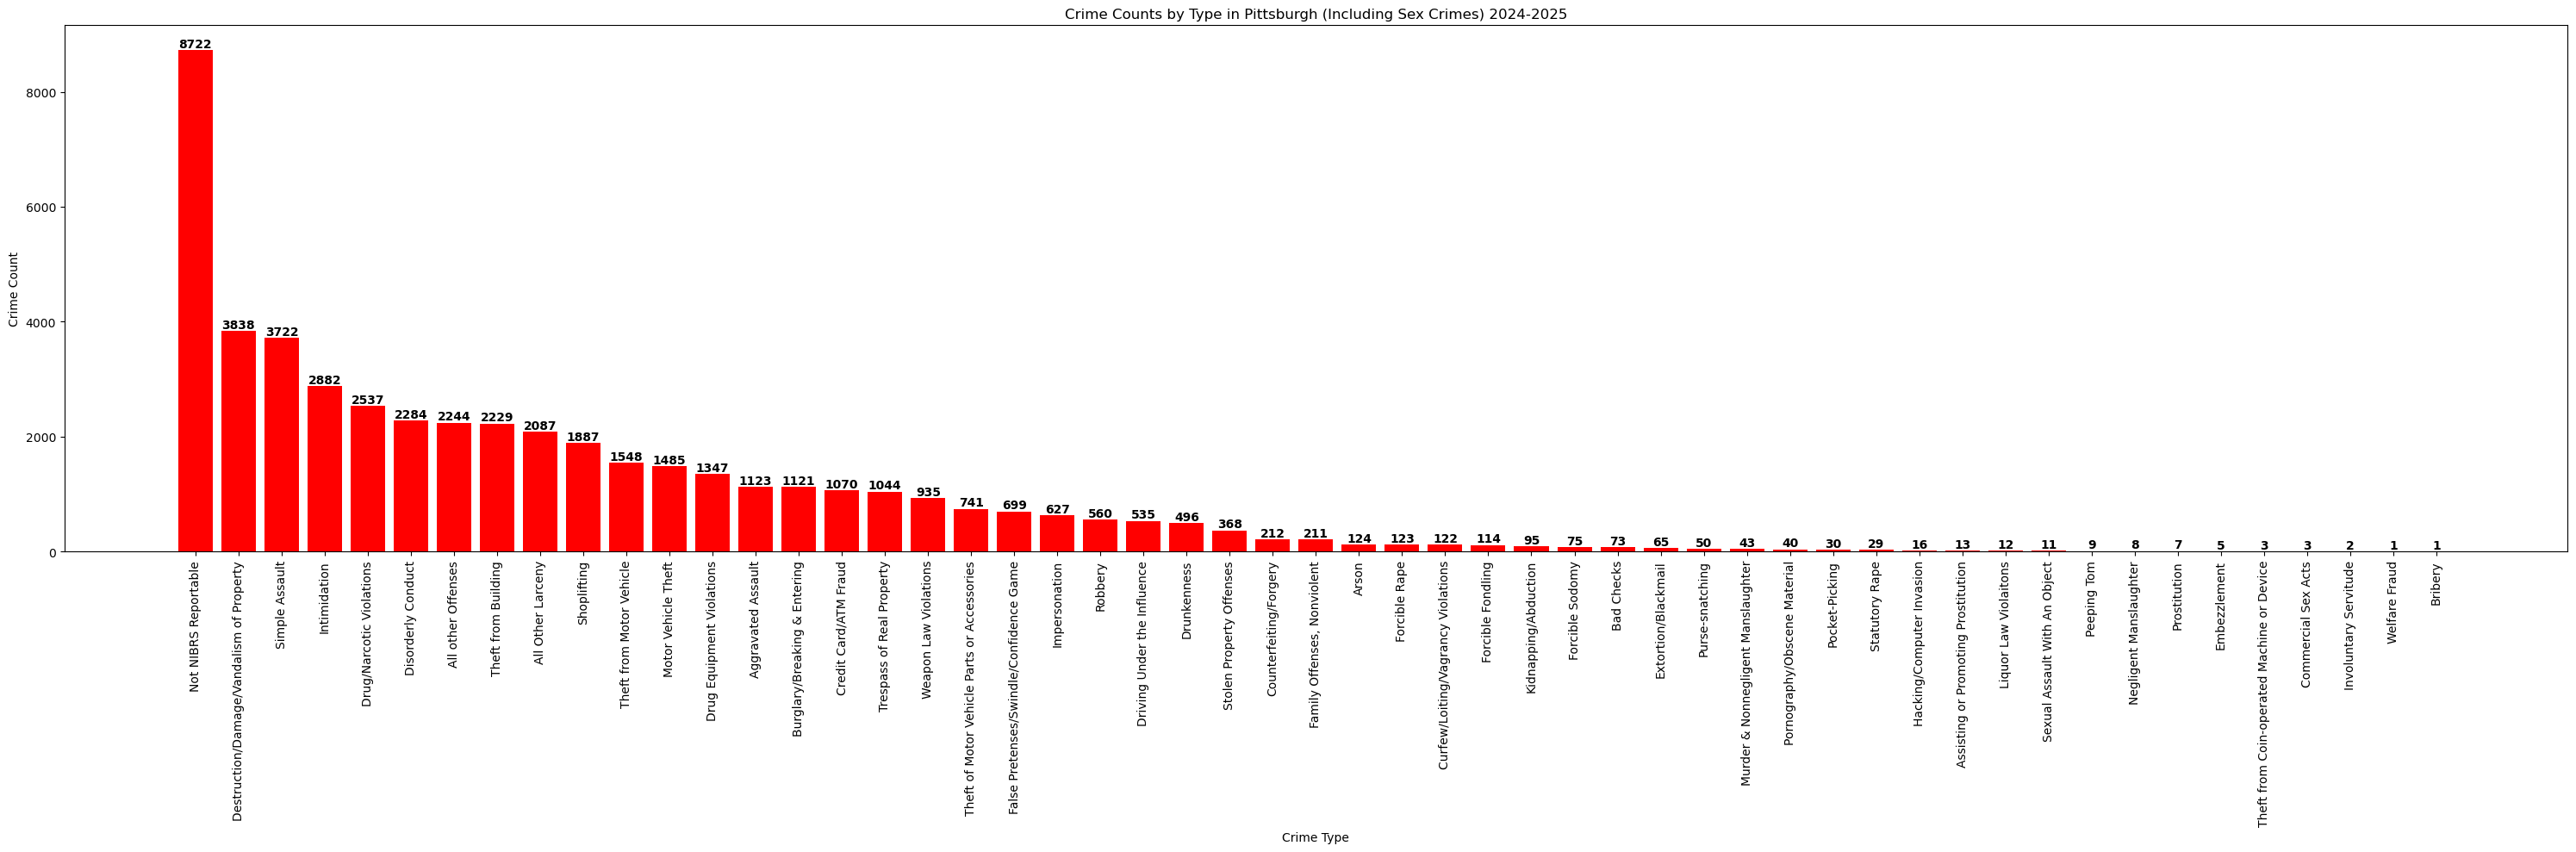

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Load the dataset
crime = pd.read_csv('pghcrime2024.csv', dtype={17: str})

# Remove rows where 'NIBRS_Offense_Type' is NaN
crime = crime[crime['NIBRS_Offense_Type'].notna()]

# Convert all values in 'NIBRS_Offense_Type' column to string (to avoid non-string issues)
crime['NIBRS_Offense_Type'] = crime['NIBRS_Offense_Type'].astype(str)

# Count the occurrences of each type of crime (NIBRS_Offense_Type)
crime_counts = Counter(crime['NIBRS_Offense_Type'])

# Sort crime types by frequency
sorted_crimes = sorted(crime_counts.items(), key=lambda x: x[1], reverse=True)

# Split the sorted list into two lists: crime types and their counts
crime_types, counts = zip(*sorted_crimes)

# Create the bar plot
plt.figure(figsize=(30, 10))
bars = plt.bar(crime_types, counts, color='red')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Add crime counts on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5,  # Position the text above the bar
             str(yval), ha='center', va='bottom', color='black', fontweight='bold')

# Set labels and title
plt.xlabel('Crime Type')
plt.ylabel('Crime Count')
plt.title('Crime Counts by Type in Pittsburgh (Including Sex Crimes) 2024-2025')

# Display the plot
plt.tight_layout()  # Adjust layout to avoid label cutoff
plt.show()


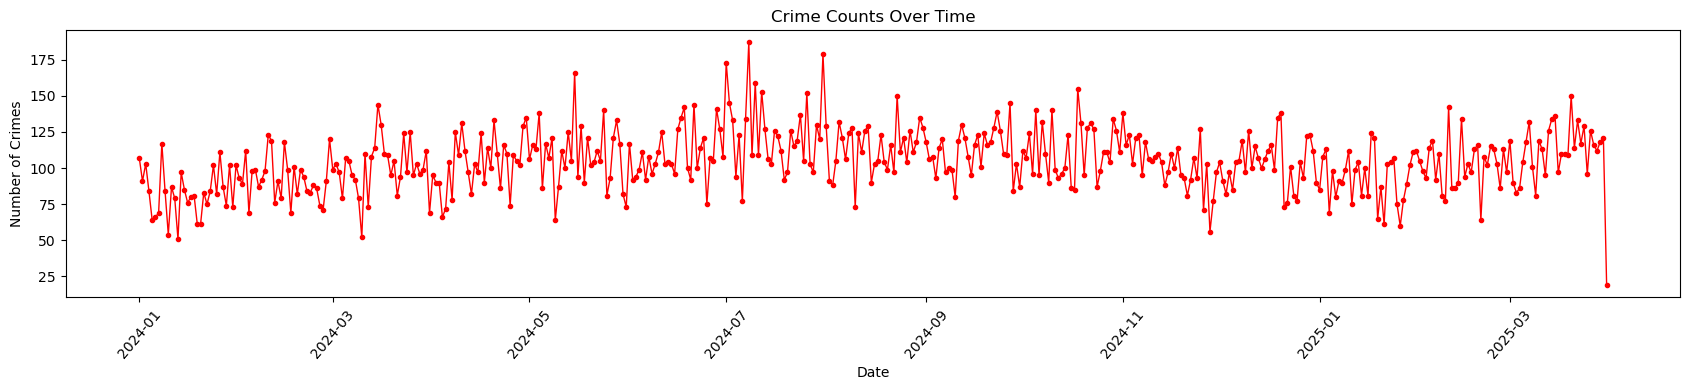

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
crime = pd.read_csv('pghcrime2024.csv', dtype={17: str})  # Ensure column 17 is read as string (if necessary)


crime['ReportedDate'] = pd.to_datetime(crime['ReportedDate'])# Convert the 'ReportedDate' column to datetime


crime['Date'] = crime['ReportedDate'].dt.date # Extract the date part from 'ReportedDate' (removes time information)

crime_counts_by_date = crime.groupby('Date').size() # Group by 'Date' and count the number of occurrences of each crime


sorted_crimes_by_date = sorted(crime_counts_by_date.items(), key=lambda x: x[0]) # Sort the counts by date (this is usually handled automatically in groupby)

# Split the sorted list into two lists: dates and crime counts
dates, counts = zip(*sorted_crimes_by_date)

# Creating Line Plot
plt.figure(figsize=(17, 4)) #Just visibility
plt.plot(dates, counts, color='red', marker='o', linestyle='-', linewidth=1, markersize=3)  # Thinner line and smaller dots

#Label Info
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.title('Crime Counts Over Time')


plt.xticks(rotation=50)

# Show the plot
plt.tight_layout()  # Adjust layout to make sure labels fit
plt.show()


In [76]:
#now lets look at the neighborhoods with the least crime and analyze what types of crime (keep in mind we have not talked about per capita yet)

Populations: for each neighborhood and frequency at which per capita of crime actually occurs th